In [3]:
import pandas as pd

file_path = "Datasets/mental.csv"
df = pd.read_csv(file_path)

df.head()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No


In [4]:
df.describe()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
count,824,824,824,824,824,824,824,824,824,824,824,824,824
unique,4,2,5,5,3,3,3,3,3,3,2,3,3
top,30-Above,Female,Housewife,31-60 days,Yes,Yes,Yes,No,Maybe,Medium,No,No,Maybe
freq,222,434,185,171,301,304,305,284,281,280,414,295,287


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      824 non-null    object
 1   Gender                   824 non-null    object
 2   Occupation               824 non-null    object
 3   Days_Indoors             824 non-null    object
 4   Growing_Stress           824 non-null    object
 5   Quarantine_Frustrations  824 non-null    object
 6   Changes_Habits           824 non-null    object
 7   Mental_Health_History    824 non-null    object
 8   Weight_Change            824 non-null    object
 9   Mood_Swings              824 non-null    object
 10  Coping_Struggles         824 non-null    object
 11  Work_Interest            824 non-null    object
 12  Social_Weakness          824 non-null    object
dtypes: object(13)
memory usage: 83.8+ KB


In [6]:
df.isnull().sum()

Age                        0
Gender                     0
Occupation                 0
Days_Indoors               0
Growing_Stress             0
Quarantine_Frustrations    0
Changes_Habits             0
Mental_Health_History      0
Weight_Change              0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
dtype: int64

In [7]:
total_genders = df['Gender'].value_counts()
total_genders

Gender
Female    434
Male      390
Name: count, dtype: int64

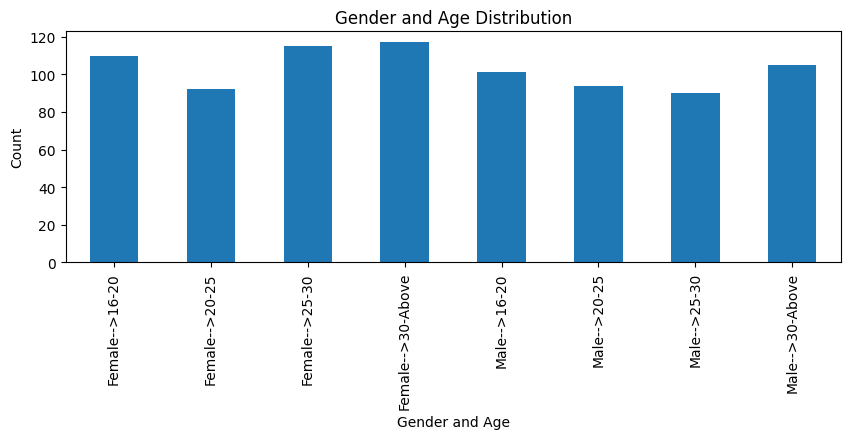

In [8]:
import matplotlib.pyplot as plt

df['Gender+Age'] = df['Gender'] + '-->' + df['Age'].astype(str)  # Convert 'Age' to string for concatenation

plt.figure(figsize=(10, 3))

df['Gender+Age'].value_counts().sort_index().plot(kind='bar')

plt.title('Gender and Age Distribution')
plt.xlabel('Gender and Age')
plt.ylabel('Count')
plt.show()

In [9]:
occupation_counts = df['Occupation'].value_counts()
most_common_occupation = occupation_counts.idxmax()

most_common_occupation, occupation_counts

('Housewife',
 Occupation
 Housewife    185
 Student      180
 Corporate    159
 Others       155
 Business     145
 Name: count, dtype: int64)

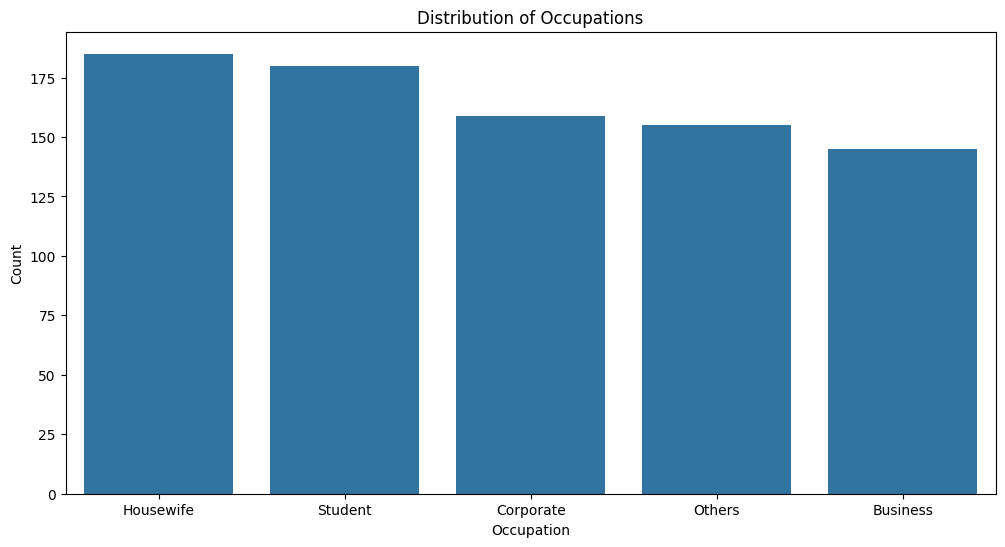

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
occupation_counts = df['Occupation'].value_counts()

plt.figure(figsize=(12, 6))

sns.barplot(x=occupation_counts.index, y=occupation_counts)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Distribution of Occupations')
plt.show()

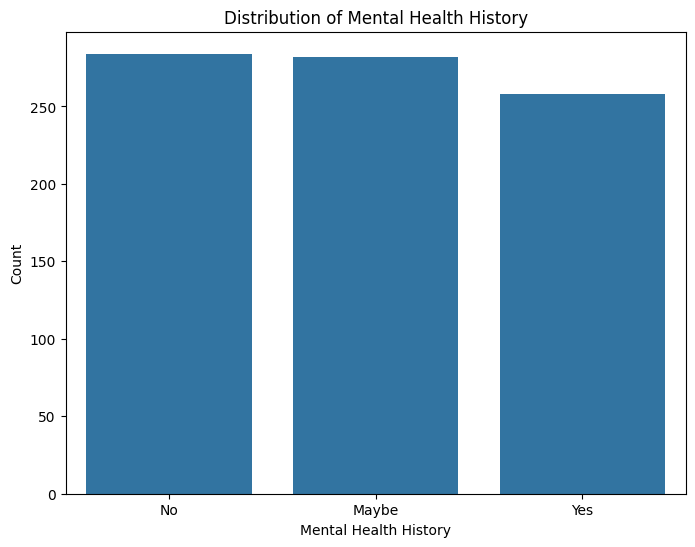

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

mental_health_counts = df['Mental_Health_History'].value_counts()

plt.figure(figsize=(8, 6))

sns.barplot(x=mental_health_counts.index, y=mental_health_counts)
plt.xlabel('Mental Health History')
plt.ylabel('Count')
plt.title('Distribution of Mental Health History')
plt.show()

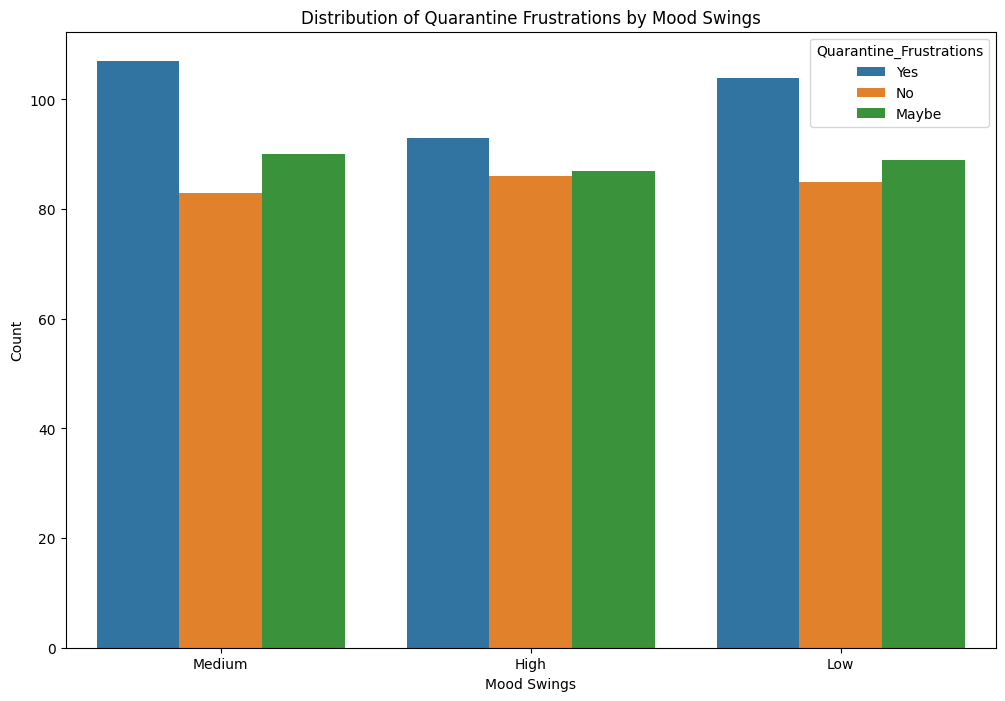

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

sns.countplot(x='Mood_Swings', hue='Quarantine_Frustrations', data=df)
plt.xlabel('Mood Swings')
plt.ylabel('Count')
plt.title('Distribution of Quarantine Frustrations by Mood Swings')
plt.show()

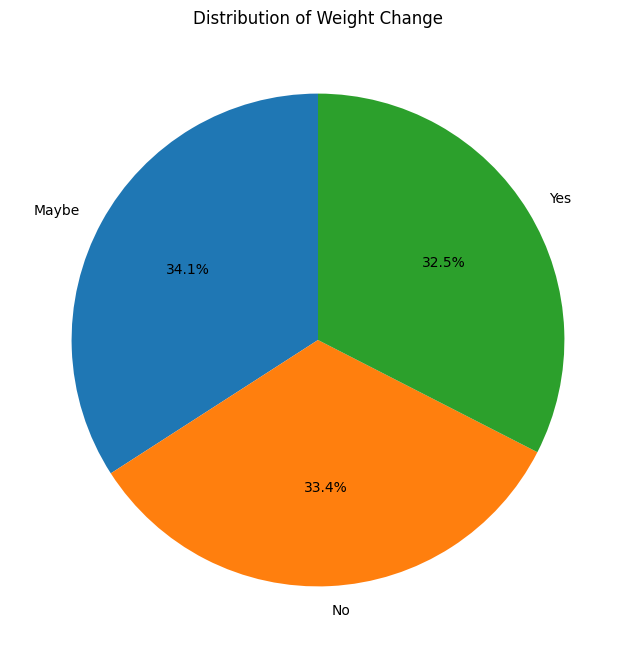

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

weight_change_counts = df['Weight_Change'].value_counts()

plt.figure(figsize=(8, 8))

plt.pie(weight_change_counts, labels=weight_change_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Weight Change')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

label_encoders = {}
for column in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le 


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Features and label
X = df_encoded.drop("Mood_Swings", axis=1)
y = df_encoded["Mood_Swings"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.32727272727272727
              precision    recall  f1-score   support

           0       0.29      0.25      0.27        57
           1       0.38      0.32      0.34        63
           2       0.31      0.44      0.37        45

    accuracy                           0.33       165
   macro avg       0.33      0.34      0.33       165
weighted avg       0.33      0.33      0.32       165



In [16]:
import joblib

joblib.dump(y_pred, 'mental.pkl')

['mental.pkl']